In [37]:
# Install required libraries
!pip install --upgrade diffusers transformers -q
# Import necessary libraries
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

In [38]:
# Mount Google Drive
drive.mount('/content/drive')

# Update file paths
data = pd.read_csv('/content/drive/MyDrive/ImageGenerative/ImagePrompts.csv', encoding='ISO-8859-1')
prompts = data['prompt'].tolist()
ids = data['imgId'].tolist()
dir0 = '/content/drive/MyDrive/ImageGenerative/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


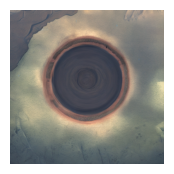

hyper realistic photo of very friendly and dystopian crater



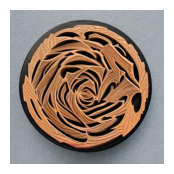

ramen carved out of fractal rose ebony, in the style of hudson river school



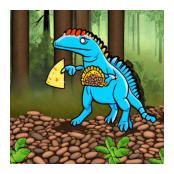

ultrasaurus holding a black bean taco in the woods, near an identical cheneosaurus



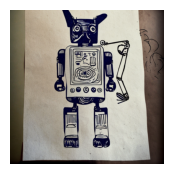

a thundering retro robot crane inks on parchment with a droopy french bulldog



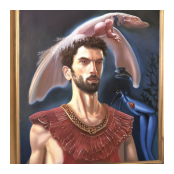

portrait painting of a shimmering greek hero, next to a loud frill-necked lizard



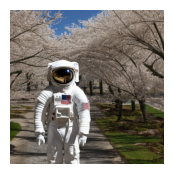

an astronaut standing on a engaging white rose, in the midst of by ivory cherry blossoms



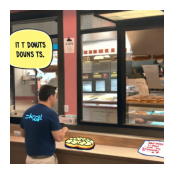

Kaggle employee Phil at a donut shop ordering all the best donuts, with a speech bubble that proclaims "Donuts. It's what's for dinner!"



In [47]:
import os

for i in range(len(data)):
    image_path = os.path.join(dir0, 'sample', ids[i] + '.png')
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        continue

    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print(prompts[i])
    print()


In [49]:
# Configuration
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400, 400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

# Replace with your Hugging Face API token
secret_hf_token = "XXXXXXXXXXXX"

# Load the pre-trained models
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token=secret_hf_token, guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

prompt_gen_model = pipeline(
    model=CFG.prompt_gen_model_id,
    device=CFG.device,
    truncation=True,
    max_length=CFG.prompt_max_length,
    num_return_sequences=CFG.prompt_dataset_size,
    seed=CFG.seed,
    use_auth_token=secret_hf_token
)


Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


  0%|          | 0/35 [00:00<?, ?it/s]

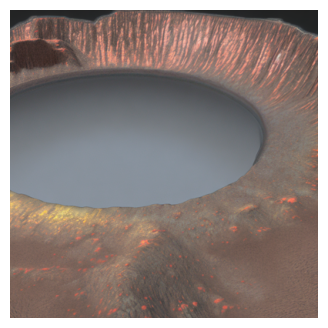

hyper realistic photo of very friendly and dystopian crater



  0%|          | 0/35 [00:00<?, ?it/s]

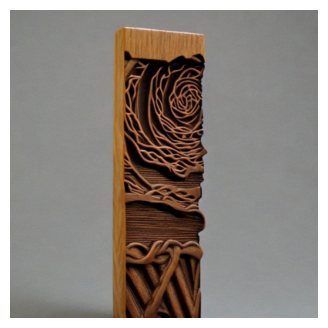

ramen carved out of fractal rose ebony, in the style of hudson river school



  0%|          | 0/35 [00:00<?, ?it/s]

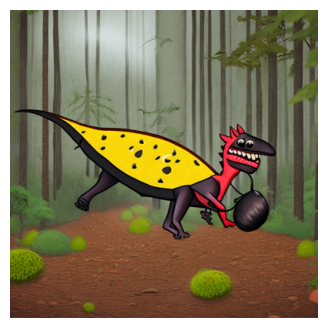

ultrasaurus holding a black bean taco in the woods, near an identical cheneosaurus



  0%|          | 0/35 [00:00<?, ?it/s]

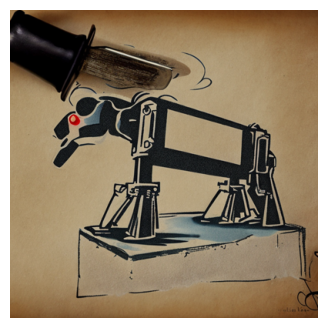

a thundering retro robot crane inks on parchment with a droopy french bulldog



  0%|          | 0/35 [00:00<?, ?it/s]

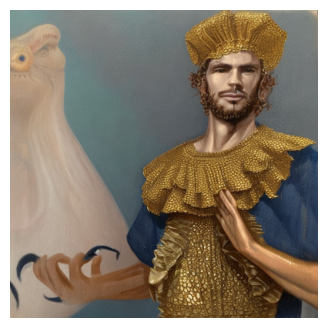

portrait painting of a shimmering greek hero, next to a loud frill-necked lizard



  0%|          | 0/35 [00:00<?, ?it/s]

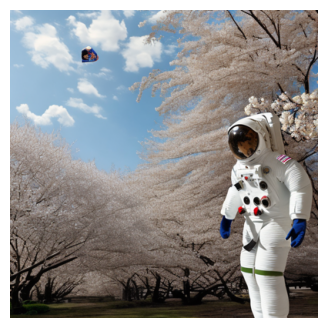

an astronaut standing on a engaging white rose, in the midst of by ivory cherry blossoms



  0%|          | 0/35 [00:00<?, ?it/s]

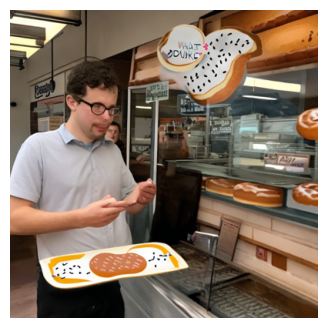

Kaggle employee Phil at a donut shop ordering all the best donuts, with a speech bubble that proclaims "Donuts. It's what's for dinner!"



In [50]:
# Generate images function
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]
    
    image = image.resize(CFG.image_gen_size)
    return image

# Generate and display images for given prompts
for prompt in prompts:
    generated_image = generate_image(prompt, image_gen_model)
    plt.figure(figsize=(4, 4))
    plt.imshow(generated_image)
    plt.axis('off')
    plt.show()
    print(prompt)
    print()


  0%|          | 0/35 [00:00<?, ?it/s]

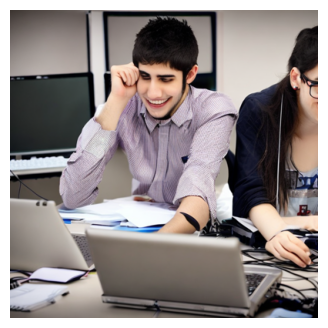

two students of computer systems engineering in class, falling in love



In [51]:
story_prompts = [
    "two students of computer systems engineering in class, falling in love",
]

# Generate and display images for each prompt in the story
for prompt in story_prompts:
    generated_image = generate_image(prompt, image_gen_model)
    plt.figure(figsize=(4, 4))
    plt.imshow(generated_image)
    plt.axis('off')
    plt.show()
    print(prompt)
    print()#import csv